---

<h1 style="text-align: center;font-size: 40px;color: red">Malaria Cell Image Detection</h1>

---

> ## What is malaria??
>>Malaria is a serious and sometimes fatal disease caused by a parasite that commonly infects a certain type of mosquito which feeds on humans. People who get malaria are typically very sick with high fevers, shaking chills, and flu-like illness. Four kinds of malaria parasites infect humans: Plasmodium falciparum, P. vivax, P. ovale, and P. malariae. In addition, P. knowlesi, a type of malaria that naturally infects macaques in Southeast Asia, also infects humans, causing malaria that is transmitted from animal to human (“zoonotic” malaria). P. falciparum is the type of malaria that is most likely to result in severe infections and if not promptly treated, may lead to death. Although malaria can be a deadly disease, illness and death from malaria can usually be prevented.
About 2,000 cases of malaria are diagnosed in the United States each year. The vast majority of cases in the United States are in travelers and immigrants returning from parts of the world where malaria transmission occurs, including sub-Saharan Africa and South Asia.

>## How People Get Malaria (Transmission)?
>>Usually, people get malaria by being bitten by an infective female Anopheles mosquito. Only Anopheles mosquitoes can transmit malaria and they must have been infected through a previous blood meal taken from an infected person. When a mosquito bites an infected person, a small amount of blood is taken in which contains microscopic malaria parasites. About 1 week later, when the mosquito takes its next blood meal, these parasites mix with the mosquito’s saliva and are injected into the person being bitten.
Because the malaria parasite is found in red blood cells of an infected person, malaria can also be transmitted through blood transfusion, organ transplant, or the shared use of needles or syringes contaminated with blood. Malaria may also be transmitted from a mother to her unborn infant before or during delivery (“congenital” malaria).

>## Is malaria a contagious disease?
>>No. Malaria is not spread from person to person like a cold or the flu, and it cannot be sexually transmitted. You cannot get malaria from casual contact with malaria-infected people, such as sitting next to someone who has malaria.

>## What are the signs and symptoms of malaria?
>>Symptoms of malaria include fever and flu-like illness, including shaking chills, headache, muscle aches, and tiredness. Nausea, vomiting, and diarrhea may also occur. Malaria may cause anemia and jaundice (yellow coloring of the skin and eyes) because of the loss of red blood cells. If not promptly treated, the infection can become severe and may cause kidney failure, seizures, mental confusion, coma, and death.

>## How soon will a person feel sick after being bitten by an infected mosquito?
>>For most people, symptoms begin 10 days to 4 weeks after infection, although a person may feel ill as early as 7 days or as late as 1 year later. Two kinds of malaria, P. vivax and P. ovale, can occur again (relapsing malaria). In P. vivax and P. ovale infections, some parasites can remain dormant in the liver for several months up to about 4 years after a person is bitten by an infected mosquito. When these parasites come out of hibernation and begin invading red blood cells (“relapse”), the person will become sick.

>Importing Necessary Libraries

In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os


In [16]:
#assign image width & height
image_width = 128
image_height = 128

parasitized_img = os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Parasitized/')
uninfected_img = os.listdir('../input/cell-images-for-detecting-malaria/cell_images/Uninfected/')
print("Number of parasitized Image:",len(parasitized_img))
print("Number of uninfected Image:", len(uninfected_img))

Number of parasitized Image: 13780
Number of uninfected Image: 13780


>Images of Blood cells(Infected & UnInfected) 

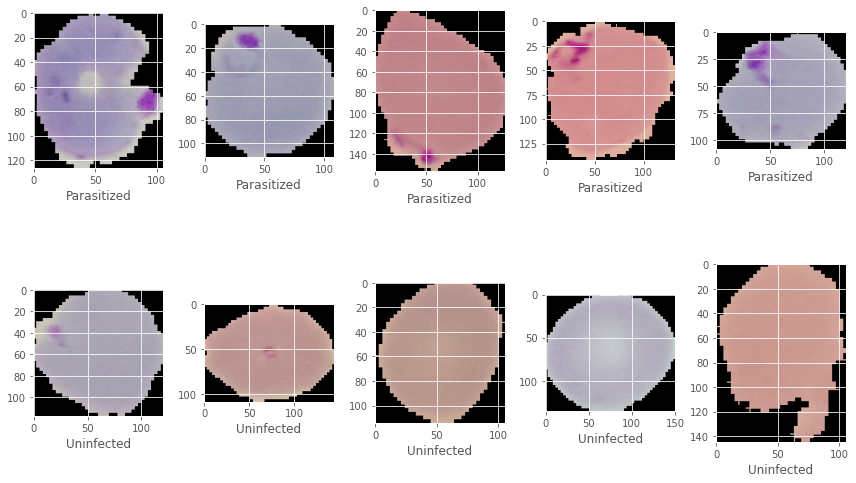

In [17]:
import random
from tensorflow.keras.preprocessing.image import load_img
list1 = ['../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'
,  '../input/cell-images-for-detecting-malaria/cell_images/Uninfected/']

fig = plt.figure(figsize=(12, 8))
#fig.set_size_inches(,13)
plt.style.use("ggplot")
j=1
for i in list1: 
    for k in range(5):

        filenames  = os.listdir(i)
        sample = random.choice(filenames)
        image = load_img(i+sample) #'../input/10-monkey-species/training/training/n1'
        plt.subplot(2,5,j)
        plt.imshow(image)
        plt.xlabel(i.split("/")[-2])
        j+=1
plt.tight_layout()

In [18]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)
train_data_generator = datagen.flow_from_directory(directory = '../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                                   target_size=(image_width,image_height),
                                                   class_mode = 'binary',
                                                   batch_size=16,
                                                   subset='training'
                                                  )


Found 22048 images belonging to 2 classes.


In [19]:
validation_data_generator = datagen.flow_from_directory(directory = '../input/cell-images-for-detecting-malaria/cell_images/cell_images/',
                                                   target_size=(image_width,image_height),
                                                   class_mode = 'binary',
                                                   batch_size=16,
                                                   subset='validation'
                                                  )

Found 5510 images belonging to 2 classes.


> ## CNN Model Building

In [20]:
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(image_width,image_height,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)            

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit_generator(generator=train_data_generator,steps_per_epoch=len(train_data_generator),
                              epochs=5,
                              validation_data=validation_data_generator,validation_steps=len(validation_data_generator),
                             verbose=1)

Epoch 1/5
1378/1378 [==============================] - 48s 34ms/step - loss: 0.5835 - accuracy: 0.7029 - val_loss: 0.3277 - val_accuracy: 0.9114
Epoch 2/5
1378/1378 [==============================] - 46s 34ms/step - loss: 0.2854 - accuracy: 0.9204 - val_loss: 0.2307 - val_accuracy: 0.9265
Epoch 3/5
1378/1378 [==============================] - 46s 33ms/step - loss: 0.2055 - accuracy: 0.9350 - val_loss: 0.1986 - val_accuracy: 0.9328
Epoch 4/5
1378/1378 [==============================] - 47s 34ms/step - loss: 0.1915 - accuracy: 0.9344 - val_loss: 0.1911 - val_accuracy: 0.9334
Epoch 5/5
1378/1378 [==============================] - 46s 34ms/step - loss: 0.1739 - accuracy: 0.9406 - val_loss: 0.1808 - val_accuracy: 0.9343


>Plotting Learning Curve

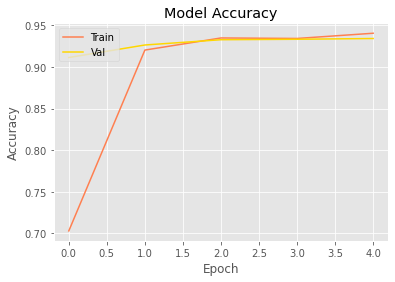

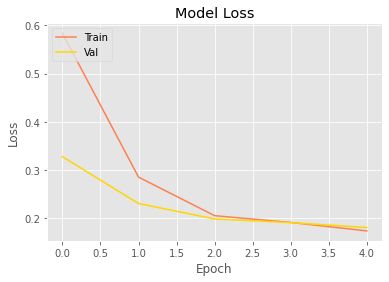

In [23]:
#accuracy
plt.plot(history.history['accuracy'],'coral')
plt.plot(history.history['val_accuracy'],'gold')
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'],'coral')
plt.plot(history.history['val_loss'],'gold')
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

>## Transfer Learning
>><h3>ResNet50</h3>

In [24]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = ResNet50(weights='imagenet',include_top=False,input_shape=(128,128,3))

In [25]:
x = resnet.output
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(1,activation='sigmoid')(x)

In [26]:
from tensorflow.keras.models import Model
final_model = Model(inputs=resnet.input,outputs = prediction)

In [27]:
final_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = final_model.fit_generator(generator=train_data_generator,steps_per_epoch=len(train_data_generator),
                              epochs=5,
                              validation_data=validation_data_generator,validation_steps=len(validation_data_generator),
                             verbose=1)

Epoch 1/5
1378/1378 [==============================] - 87s 63ms/step - loss: 0.2996 - accuracy: 0.9217 - val_loss: 0.2771 - val_accuracy: 0.9441
Epoch 2/5
1378/1378 [==============================] - 86s 62ms/step - loss: 0.1830 - accuracy: 0.9487 - val_loss: 0.1770 - val_accuracy: 0.9474
Epoch 3/5
1378/1378 [==============================] - 86s 62ms/step - loss: 0.1900 - accuracy: 0.9484 - val_loss: 4.2942 - val_accuracy: 0.9354
Epoch 4/5
1378/1378 [==============================] - 86s 62ms/step - loss: 0.2244 - accuracy: 0.9491 - val_loss: 0.2329 - val_accuracy: 0.9479
Epoch 5/5
1378/1378 [==============================] - 85s 62ms/step - loss: 0.1769 - accuracy: 0.9522 - val_loss: 0.1706 - val_accuracy: 0.9405


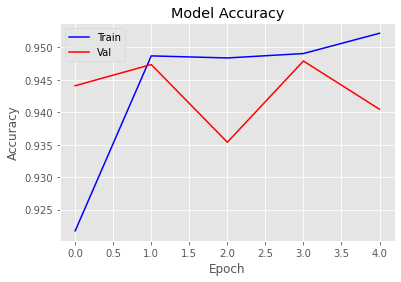

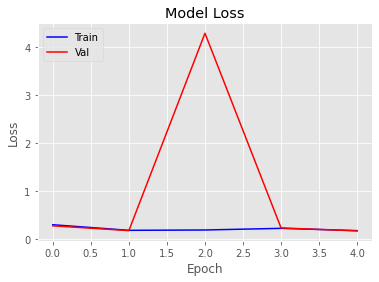

In [28]:
#accuracy
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')
plt.title('Model Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

#Loss
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc='upper left')
plt.show()